In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Adjust size of plots
plt.rcParams['figure.figsize'] = [6, 4]

# Univariate Regression

## Notation

We have a given dataset 

$$
    (x,y) \in \mathbb{R}^{m \times 2},
$$

with $m$ the number of samples.

In the dateset we have the features 

$$
    x \in \mathbb{R}^m
$$ 

and the targets 

$$
    y \in \mathbb{R}^m.
$$

We say

$$
    (x^{(i)}, y^{(i)}) \in \mathbb{R}^{1 \times 2}
$$

is the $i$-th example $(i = 1, \dots, m)$.

## Boston dataset

In [3]:
# Load dataset
data = load_boston()

# Create dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Text(0, 0.5, 'Target')

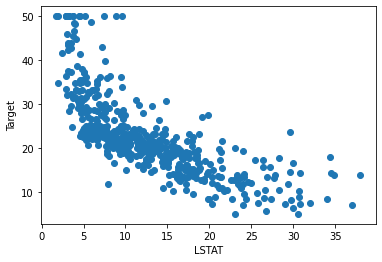

In [4]:
# Define feature index
feat_idx = 12

# Split data table into data X and class labels y
X = df.iloc[:, feat_idx].values.reshape(-1, 1)
y = df.iloc[:, -1].values

# Set names of labels for plot
xlabel = df.columns[feat_idx]
ylabel = df.columns[-1]

# Plot data
plt.scatter(X, y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [5]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 1), (152, 1), (354,), (152,))

Text(0, 0.5, 'Target')

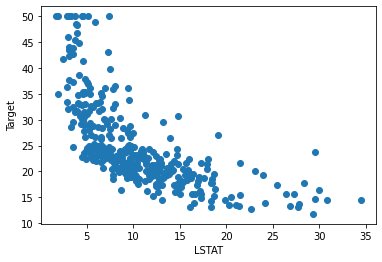

In [6]:
# Plot training data
plt.scatter(X_train, y_train)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

Text(0, 0.5, 'Target')

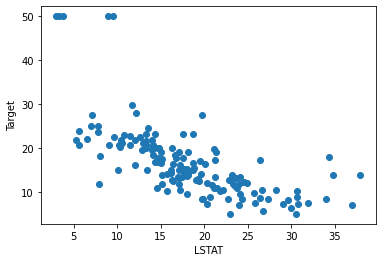

In [7]:
# Plot test data
plt.scatter(X_test, y_test)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

## Custom implementation

### Hypothesis

The hypothesis is given by

$$
    h_{w, b}(x) = w x + b, 
$$

where $w \in \mathbb{R}$ is the weight (coefficent) and $b \in \mathbb{R}$ is the bias (intercept).

We can also write

$$
    h_{w}(x) = \sum_{j=1}^2 w_j x =  w_0 + w_1 x,
$$

if we set $w_1 := w$ and $w_0 := b$ and $x_0 := 1$.

In [8]:
# Compute the hypothesis and return as shape (n_samples,)
hypo = lambda X, w, b: (w * X + b).reshape(len(X))

### Cost function

The Mean Squared Error is given by

$$
\begin{align*}
    MSE(w,b) &= \frac{1}{m} \sum\limits_{i=1}^m (y^{(i)} - h_{w,b}(x^{(i)}))^2\\
             &= \frac{1}{m} \sum\limits_{i=1}^m (y^{(i)} - (w x^{(i)} + b))^2 ,
\end{align*}
$$

where $m$ is the number of samples.

In [9]:
# Compute the cost function (mean squared error)
mse = lambda X, y, w, b: np.mean(np.square(y - hypo(X, w, b)))

## Gradient Descent

### Goal: 

$$
    \underset{w \in \mathbb{R}, ~ b \in \mathbb{R}}{\textbf{minimize}} MSE(w,b)
$$

### Idea: 

$$
\begin{align*}
    w &= w - \alpha \cdot \frac{\partial}{\partial w} MSE(w,b) \\
    b &= b - \alpha \cdot \frac{\partial}{\partial b} MSE(w,b)
\end{align*}
$$

### Partial derivaties:

$$
\begin{align*}
    \frac{\partial}{\partial w} MSE(w,b) &= \frac{2}{m} \sum\limits_{i=1}^m x^{(i)} (y^{(i)} - h_{w,b}(x^{(i)})) \\
    \frac{\partial}{\partial b} MSE(w,b) &= \frac{2}{m} \sum\limits_{i=1}^m y^{(i)} - h_{w,b}(x^{(i)})
\end{align*}
$$

In [10]:
def gradient_descent(X, y, w, b, alpha, num_iters):  
    """Simple gradient descent.
    
    TODO: Plot.
    
    Parameter
    ---------
        X : ndarray of shpae (n_samples, n_features)
            Input data.
        y : ndarray of shape (n_samples,)
            Labels.
        w : float
            Weight.
        b : float
            Bias.
    
    Return
    ------
        w : float
            Updated weight.
        b : float
            Updated bias.
    """
    # Number of samples
    m = len(X)
    
    # Iteratively update the weight and bias
    for i in range(0, num_iters):
        
        # Compute predictions (for all samples)
        predictions = hypo(X, w, b)
        
        # Compute residuals (for all samples)
        residuals = predictions - y
        
        # Compute partial derivitaves 
        w_gradient = 2 * np.mean(residuals.reshape(-1, 1) * X, axis=0)
        b_gradient = 2 * np.mean(residuals)

        # Update weigth and bias
        w = w - alpha * w_gradient
        b = b - alpha * b_gradient
        
    return w, b

In [11]:
# Initialize weight and bias
w, b = 0.0, 0.0

# Set number of iterations and stepsize alpha
num_iters, alpha = 100000, 0.001

# Run gradient descent
w, b = gradient_descent(X_train, y_train, w, b, alpha,
                        num_iters) 
w, b

(array([-0.96283978]), 35.040308689538406)

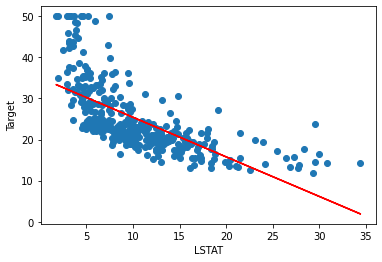

In [12]:
# Plot training data
plt.scatter(X_train, y_train)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# Add regression line
plt.plot(X_train, hypo(X_train, w, b), color='r')

In [13]:
# Compute training MSE
mse(X_train, y_train, w, b)

39.03229803456594

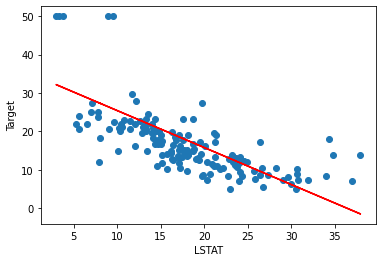

In [14]:
# Plot test data
plt.scatter(X_test, y_test)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# Add regression line
plt.plot(X_test, hypo(X_test, w, b), color='r')

In [15]:
# Compute test MSE
mse(X_test, y_test, w, b)

37.58214095688502

## $R^2$ score

The residual sum of squares is defined by

$$
    SS_{res} = \sum_{i=1}^m (y^{(i)} - h_{w,b}(x^{(i)}))^2.
$$

The total sum of squares is defined by

$$
    SS_{res} = \sum_{i=1}^m (y^{(i)} - \frac{1}{n} \sum_{i=1}^n y^{(i)})^2.
$$

The $R^2$ score (or coefficient of determenation) is then defined by

$$
    R^2 = 1 - {SS_{\rm res}\over SS_{\rm tot}}.
$$

In [16]:
# Function for residual sum of squares
ss_res = lambda X, y, w, b: np.sum(np.square(y - hypo(X, w, b)))

# Function for total sum of squares
ss_tot = lambda y: np.sum(np.square(y - np.mean(y)))

# Function for coefficient of determination aka R^2
r2 = lambda X, y, w, b: 1 - ss_res(X, y, w, b) / ss_tot(y)

In [17]:
# Compute training R2
r2(X_train, y_train, w, b)

0.45015027749039993

In [18]:
# Compute test R2
r2(X_test, y_test, w, b)

0.43354555520866367

## Scikit-learn

In [19]:
# Define scikit-learn linear regression model (wraps least-squares from SciPy)
reg = LinearRegression()

# Train model
reg.fit(X_train, y_train)

# Show weight and bias
reg.coef_, reg.intercept_

(array([-0.96283978]), 35.04030868954574)

In [20]:
# Make training predictions
y_pred = reg.predict(X_train)

# Show training MSE and R2
mean_squared_error(y_train, y_pred), r2_score(y_train, y_pred)

(39.03229803456594, 0.45015027749039993)

In [21]:
# Make test predictions
y_pred = reg.predict(X_test)

# Show test MSE and R2
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(37.582140956888544, 0.4335455552086105)